<a href="https://colab.research.google.com/github/kartikayv/USsales/blob/main/USsales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTALLING LIBRARIES**

In [1]:
# Install necessary libraries
!pip install pandas matplotlib seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://drive.google.com/uc?id=16q4eM1YNq-0vG-_G-sC3TVIWaxEsCMam"
sales_data = pd.read_csv(url)

# Display the first few rows of the dataset
sales_data.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


**TOTAL SALES**

In [2]:
# Calculate total sales
total_sales = sales_data['Sales'].sum()
print(f"Total Sales: ${total_sales}")


Total Sales: $34492035.97


**SALES TRENDS OVER TIME**

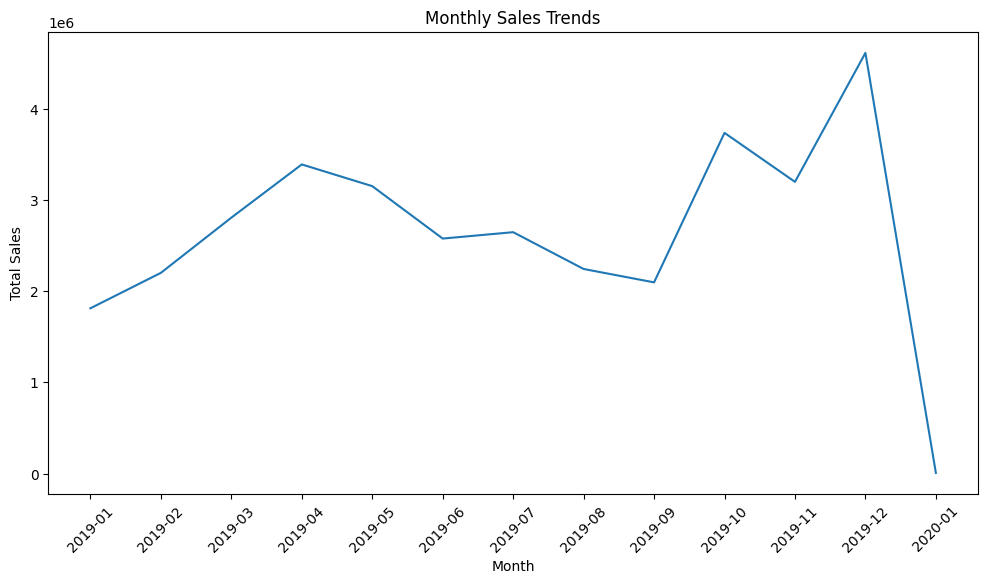

In [4]:
# Convert the 'OrderDate' column to datetime
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Extract month and year from 'OrderDate'
sales_data['Month'] = sales_data['Order Date'].dt.to_period('M')

# Group by month and calculate total sales
monthly_sales = sales_data.groupby('Month')['Sales'].sum()

# Plot the sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


**BEST SELLING PRODUCTS AND THEIR VISUALIZATION**

Top 5 Best-Selling Products:
Product
Macbook Pro Laptop        8037600.00
iPhone                    4794300.00
ThinkPad Laptop           4129958.70
Google Phone              3319200.00
27in 4K Gaming Monitor    2435097.56
Name: Sales, dtype: float64


<ipython-input-24-f7e5656e39b7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


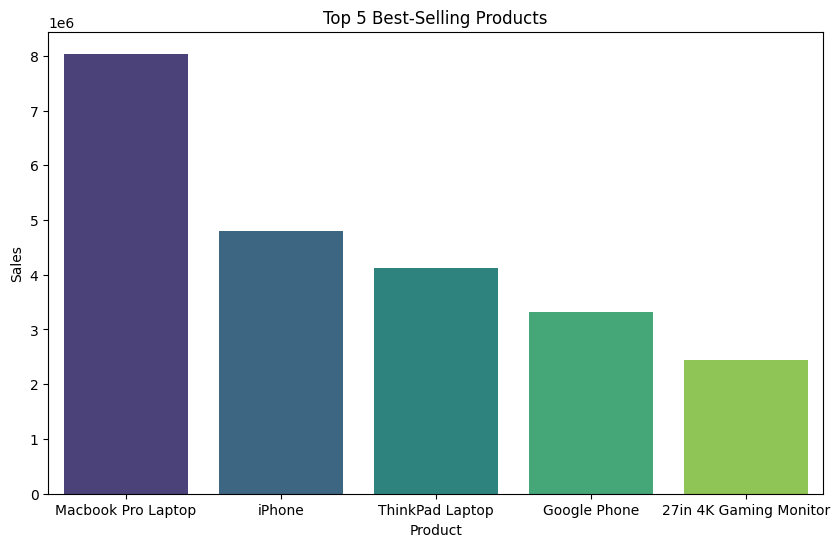

In [24]:
# Group by Product and calculate total sales for each product
best_selling_products = sales_data.groupby('Product')['Sales'].sum().sort_values(ascending=False)

# Display the top 5 best-selling products
top_products = best_selling_products.head(5)
print("Top 5 Best-Selling Products:")
print(top_products)

# Plot the bar chart for best-selling products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()
